In [147]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import glob
import os 
%matplotlib inline

In [62]:
phenotypes = pd.read_csv('./spss_gwas2/sepsis_gwas_v2.csv', header=0, index_col=None)
data = np.load('./spss_gwas2/Caucasians/AutoEncoder_mean_squared_error_LatentSpaceDimension4.npy')
grm = pd.read_csv('./spss_gwas2/Caucasians/grm.csv', index_col=0)
patientID = np.array(grm.index)

for pid in phenotypes['V1']:
    if pid not in patientID:
        idx = phenotypes[phenotypes['V1'] == pid].index
        phenotypes.drop(idx,inplace=True)

phenotypes = phenotypes.sort_values(['V1'])


In [85]:
filenames = [os.path.basename(x) for x in glob.glob('./spss_gwas2/Caucasians/*.npy')]
filename = 'UMAP_correlation_30_0.5.npy'
data = np.load('./spss_gwas2/Caucasians/' + filename)

# Ages

UMAP_correlation_30_0.5.npy


Text(0.5, 1.0, 'Ages(day)_UMAP_correlation_30_0')

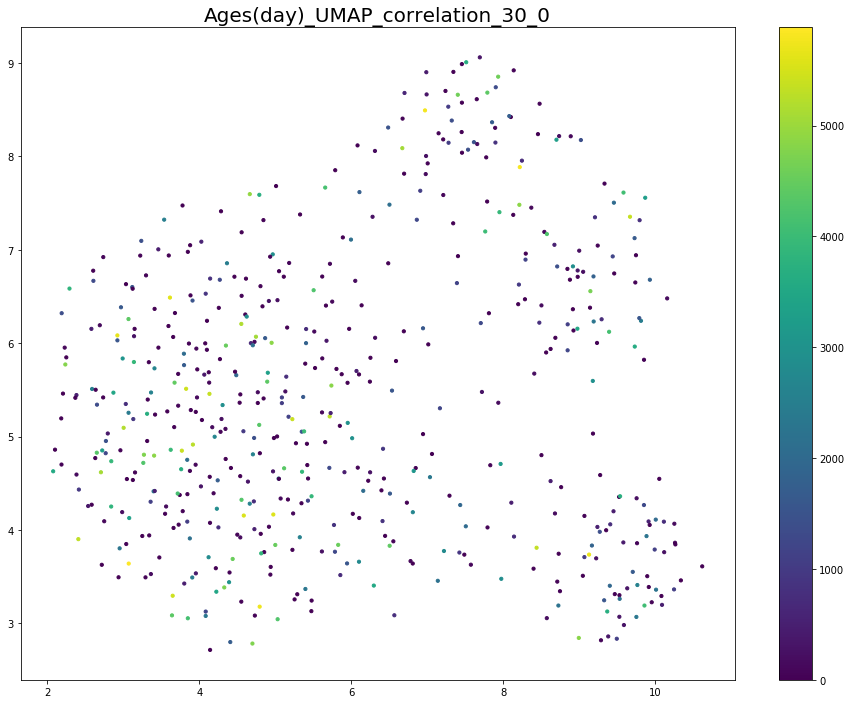

In [97]:
fig = plt.figure(figsize=(16,12))
plt.scatter(data[:, 0], data[:, 1], s=10, c=phenotypes['age.days'])
cbar = plt.colorbar()
plt.title('Ages(day)_' + filename.split('.')[0], fontsize=20)

# psofa scores

Text(0.5, 1.0, 'psofa_scoreUMAP_correlation_30_0')

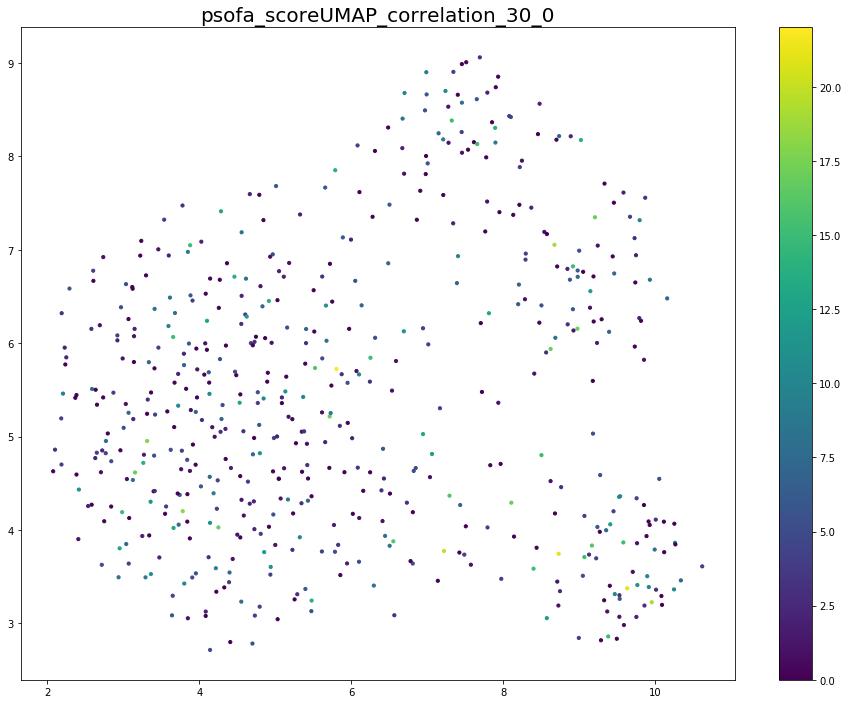

In [100]:
fig = plt.figure(figsize=(16,12))
plt.scatter(data[:, 0], data[:, 1], s=10, c=phenotypes['psofa.score'])
cbar = plt.colorbar()
plt.title('psofa_score_' + filename.split('.')[0], fontsize=20)

## psofa subscores 

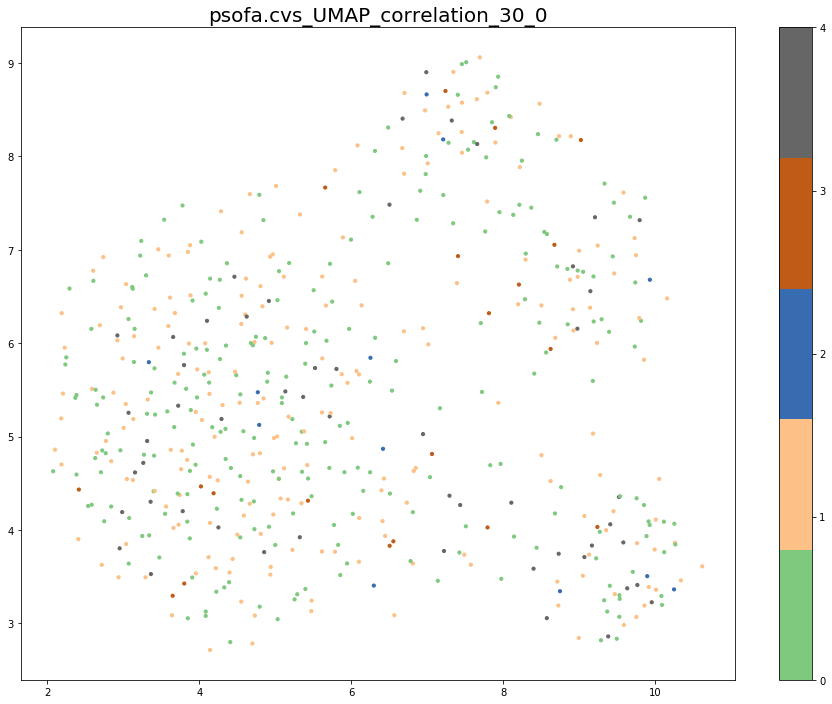

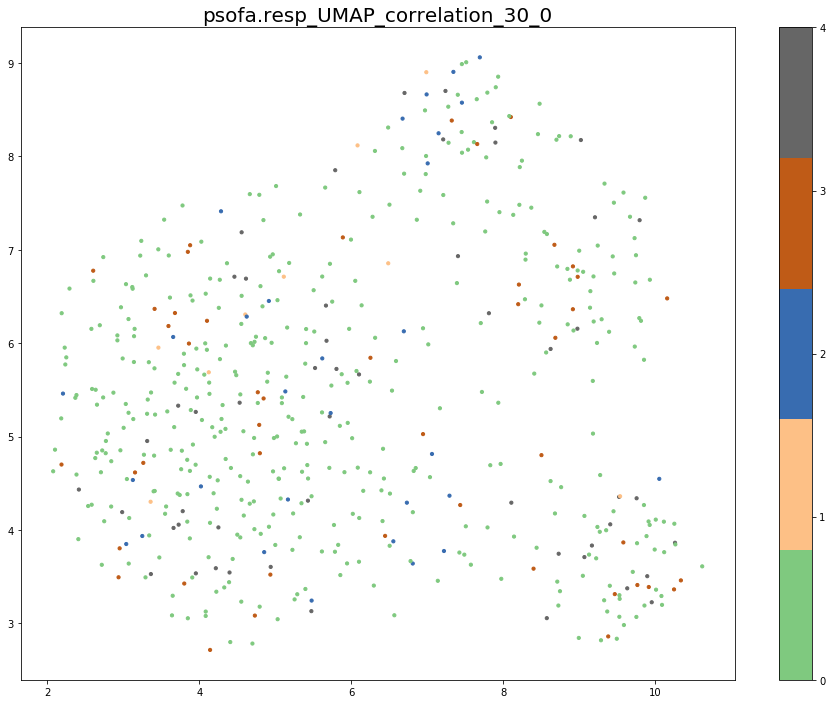

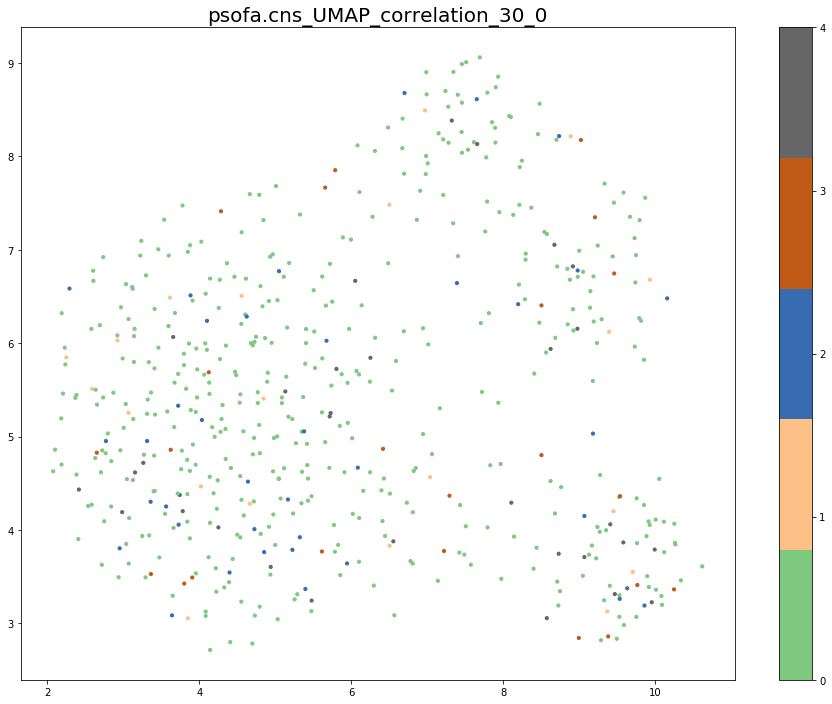

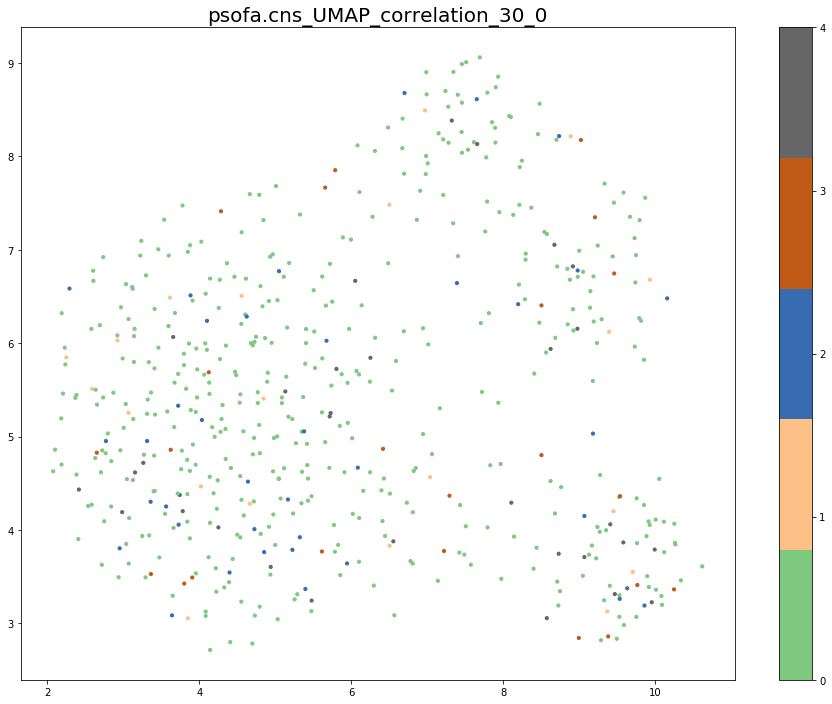

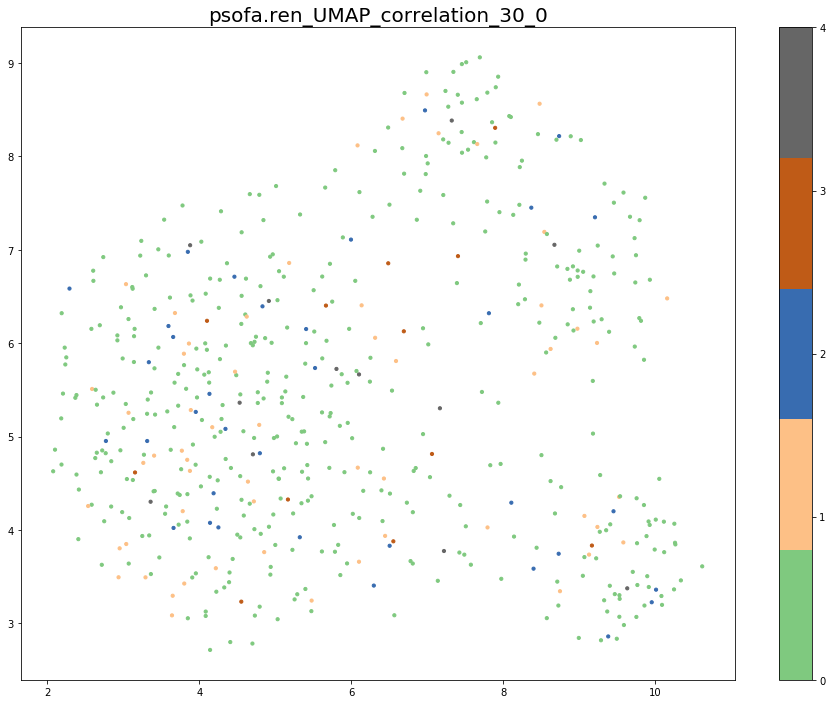

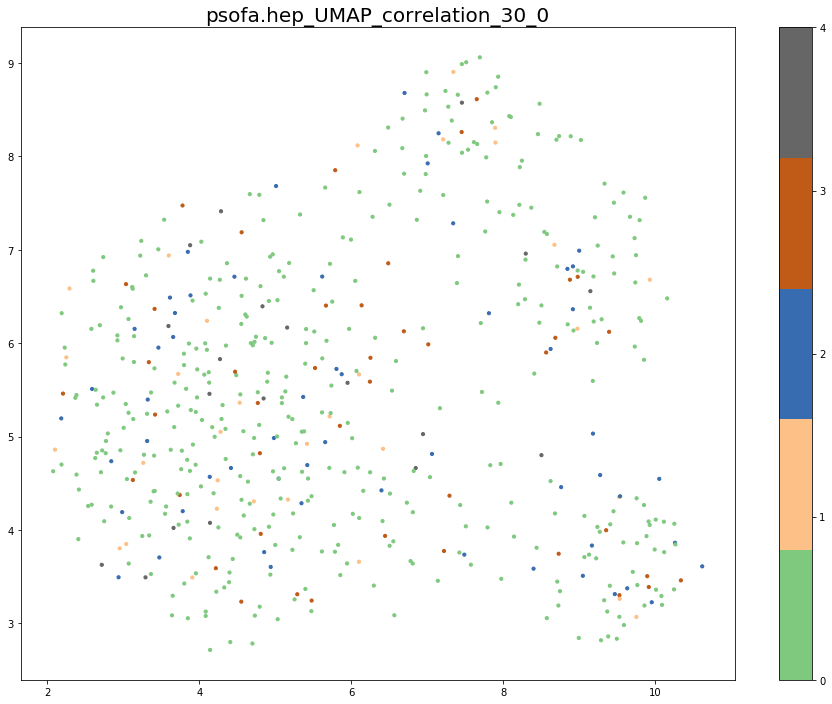

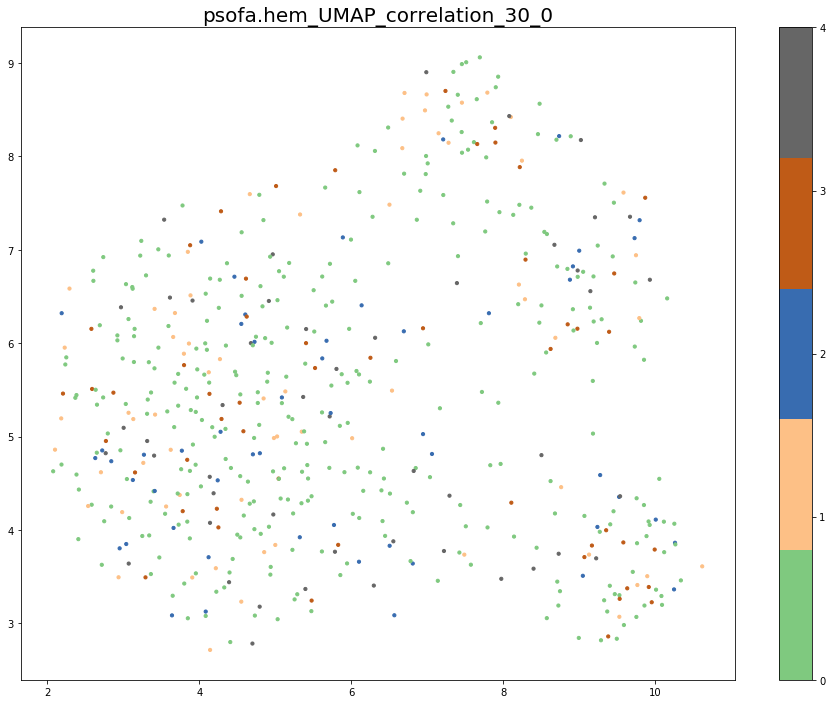

In [167]:
scores_list = ['psofa.cvs', 'psofa.resp', 'psofa.cns', 'psofa.cns','psofa.ren', 'psofa.hep','psofa.hem']
for score in scores_list:
    fig = plt.figure(figsize=(16,12))
    plt.scatter(data[:, 0], data[:, 1], s=10, c=phenotypes[score],cmap=plt.cm.get_cmap('Accent', 5))
    cbar = plt.colorbar(ticks=[0,1,2,3,4])
    plt.title(score + '_' + filename.split('.')[0], fontsize=20)

# cons05 score

Text(0.5, 1.0, 'psofa_scoreUMAP_correlation_30_0')

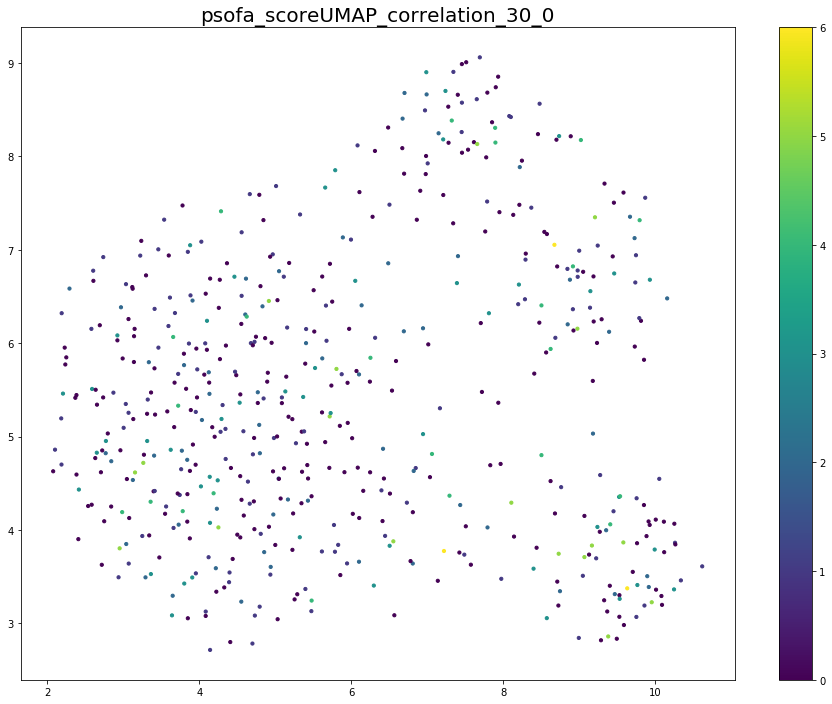

In [123]:
fig = plt.figure(figsize=(16,12))
plt.scatter(data[:, 0], data[:, 1], s=10, c=phenotypes['cons05.score'])
plt.colorbar(ticks=np.linspace(0,6,7))
plt.title('psofa_score_' + filename.split('.')[0], fontsize=20)

## cons05 subscores

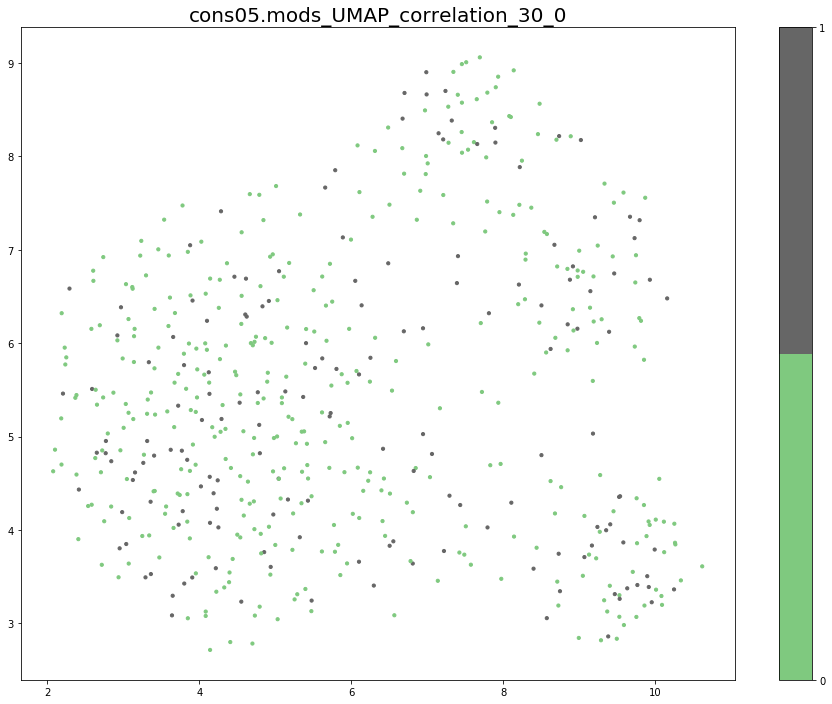

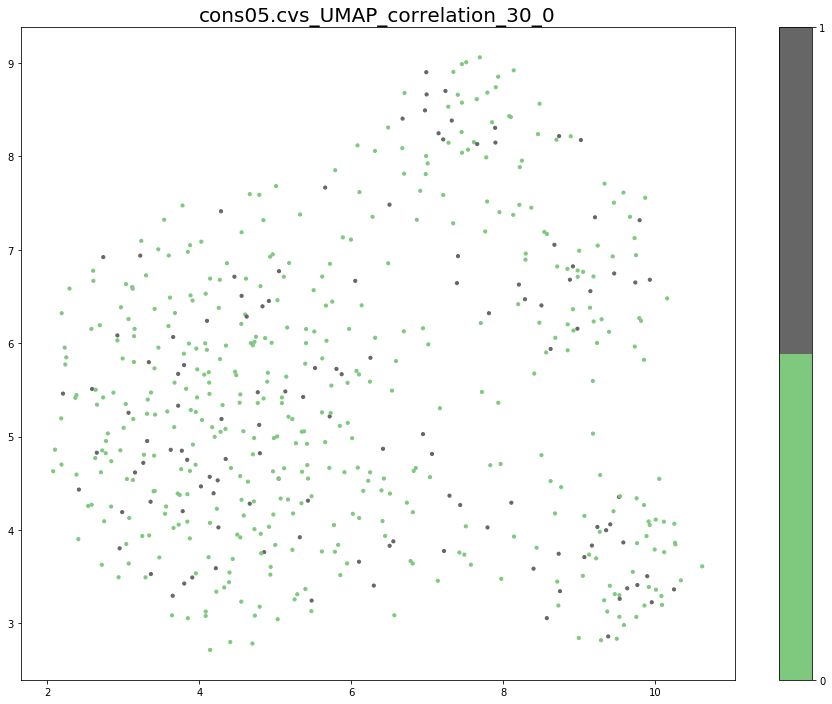

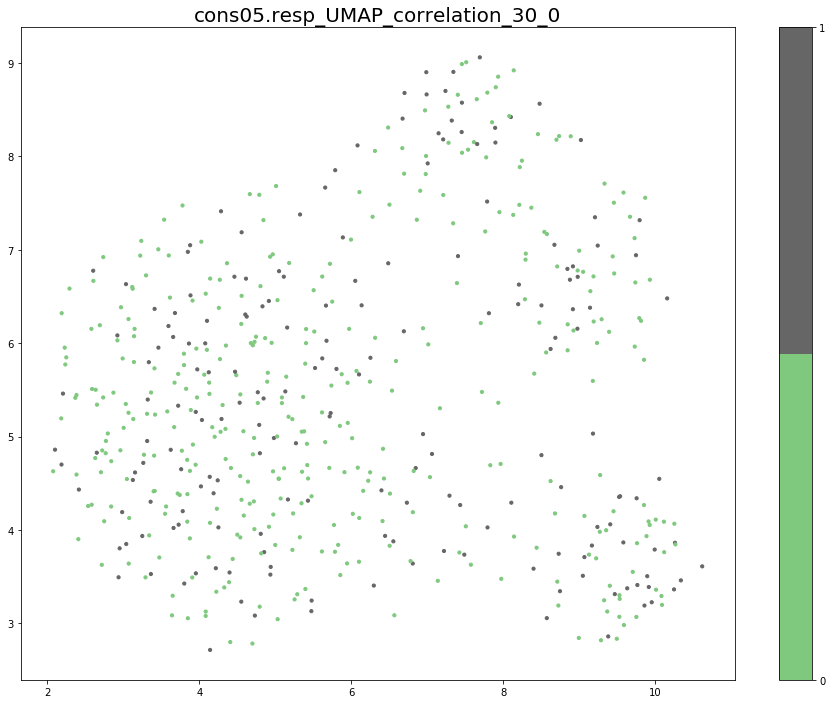

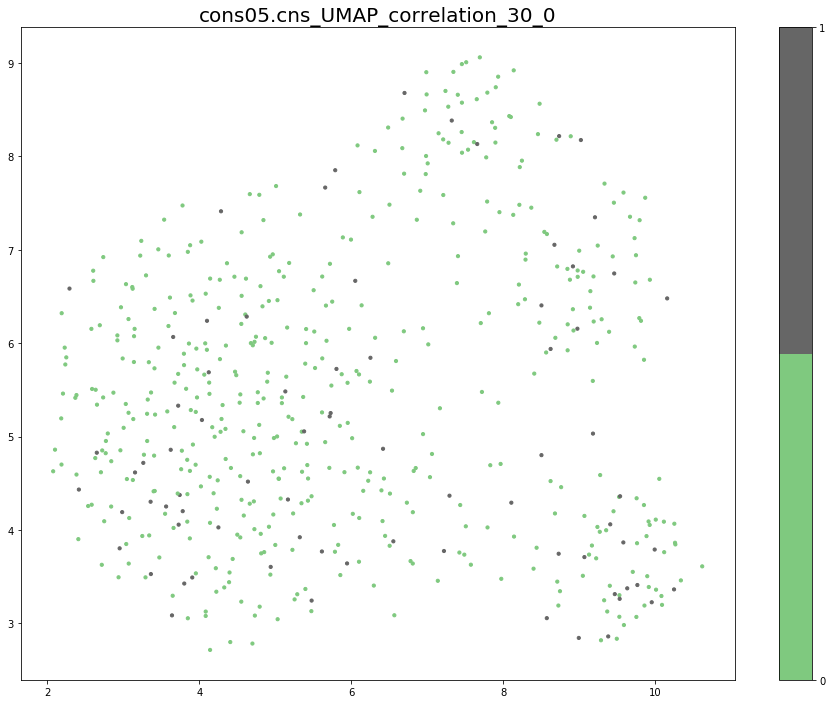

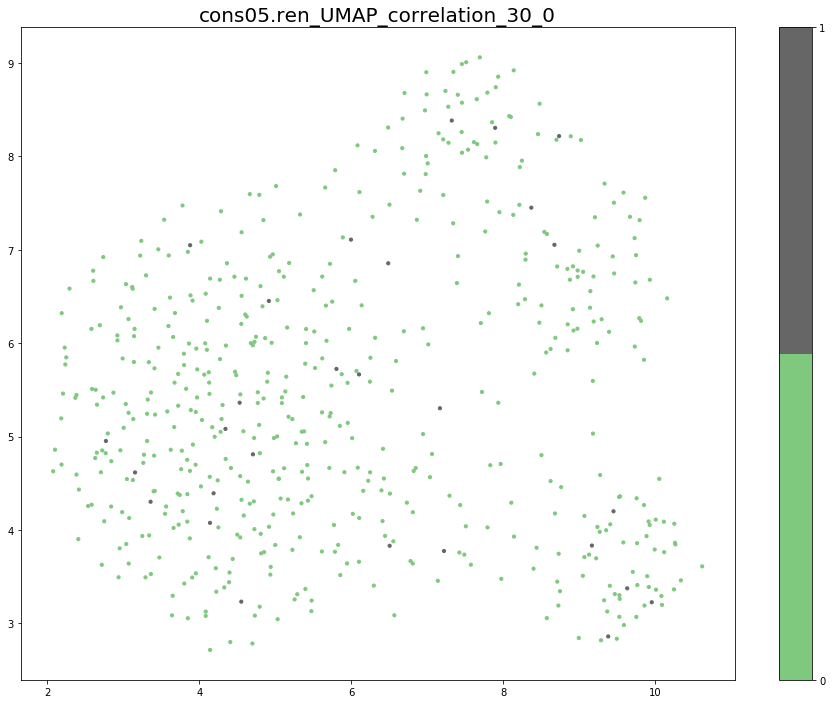

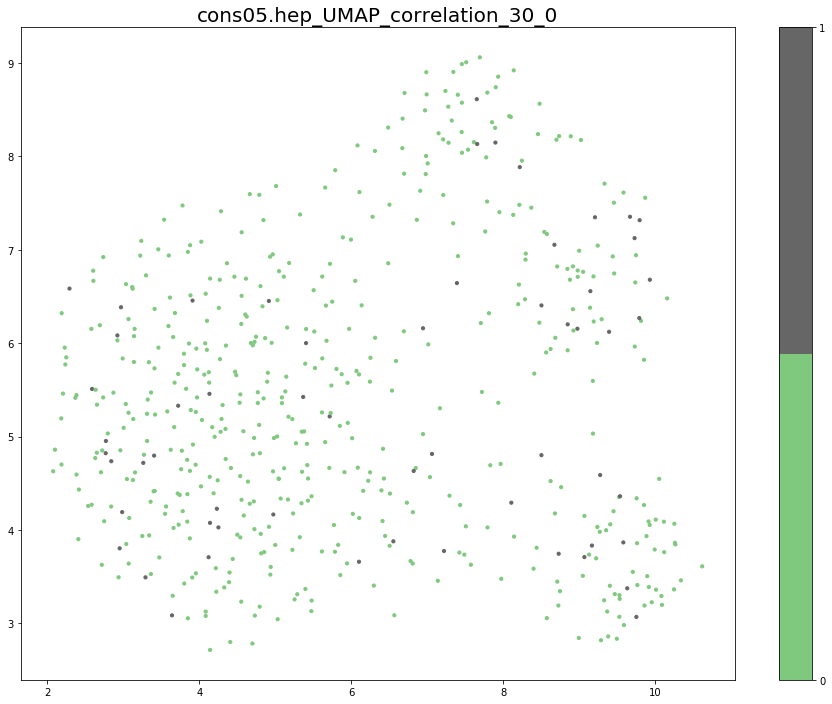

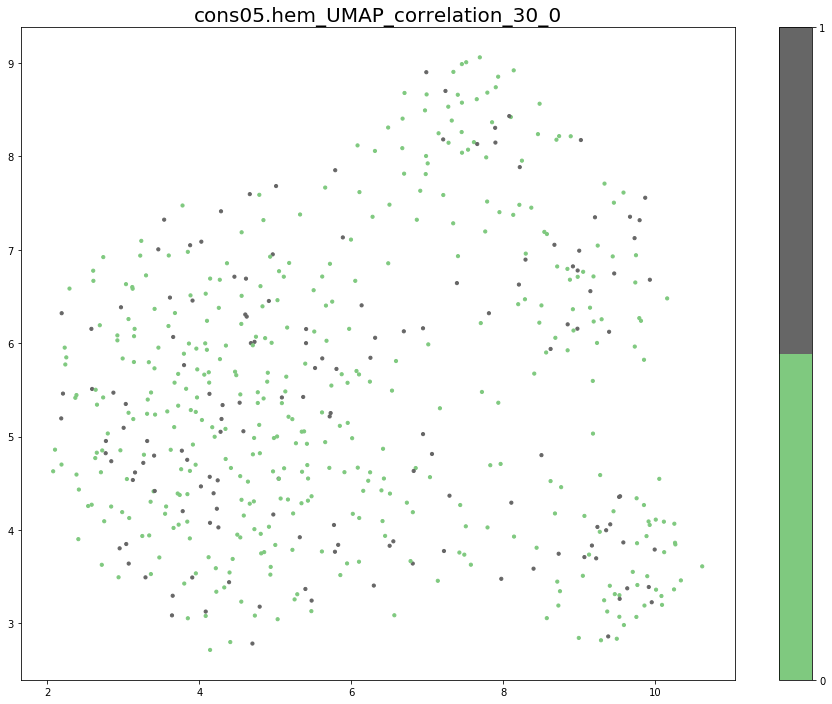

In [165]:
scores_list = ['cons05.mods', 'cons05.cvs','cons05.resp','cons05.cns' ,'cons05.ren','cons05.hep','cons05.hem']
mapping = {'yes':1, 'no':0}

for score in scores_list:
    phenotypes[score] = phenotypes[score].fillna('no')
    color = [mapping[phenotypes[score].iloc[i]] for i in range(len(phenotypes[score]))]
    fig = plt.figure(figsize=(16,12))
    plt.scatter(data[:, 0], data[:, 1], s=10, c=color,cmap=plt.cm.get_cmap('Accent', 2))
    plt.colorbar(ticks=[0,1])
    plt.title(score + '_' + filename.split('.')[0], fontsize=20)

# pelod score

Text(0.5, 1.0, 'psofa_scoreUMAP_correlation_30_0')

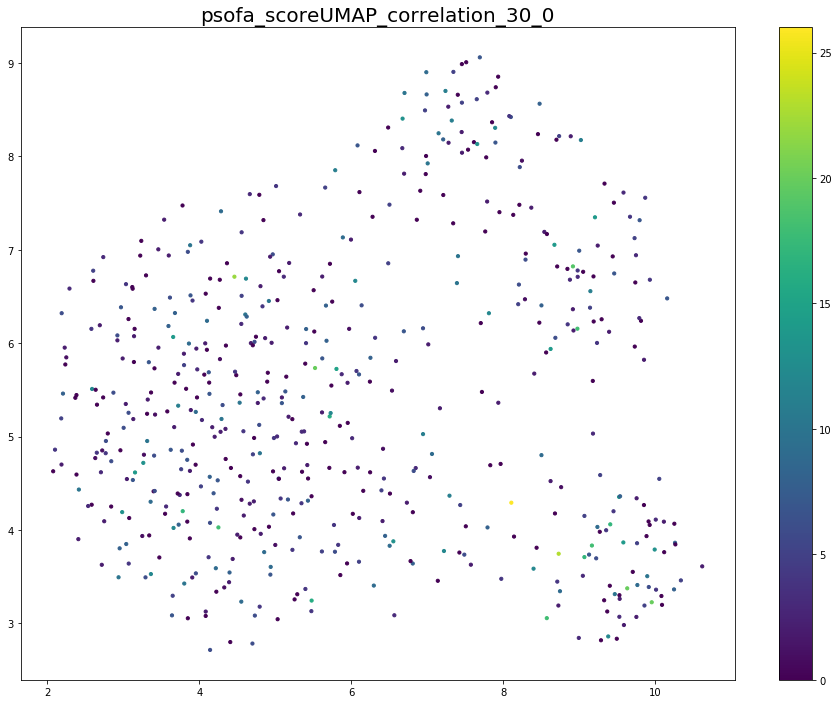

In [125]:
fig = plt.figure(figsize=(16,12))
plt.scatter(data[:, 0], data[:, 1], s=10, c=phenotypes['pelod.score'])
cbar = plt.colorbar()
plt.title('psofa_score_' + filename.split('.')[0], fontsize=20)

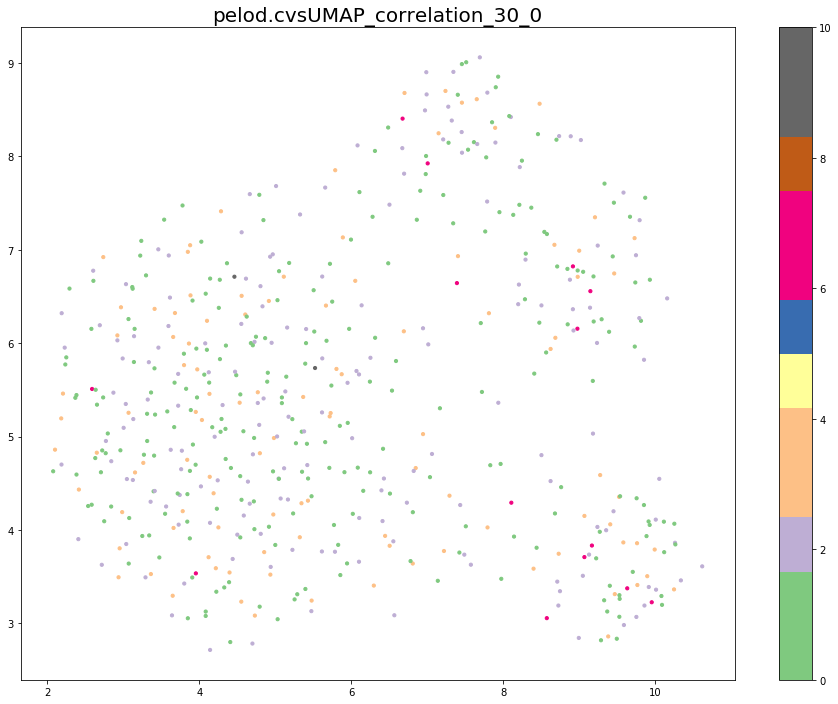

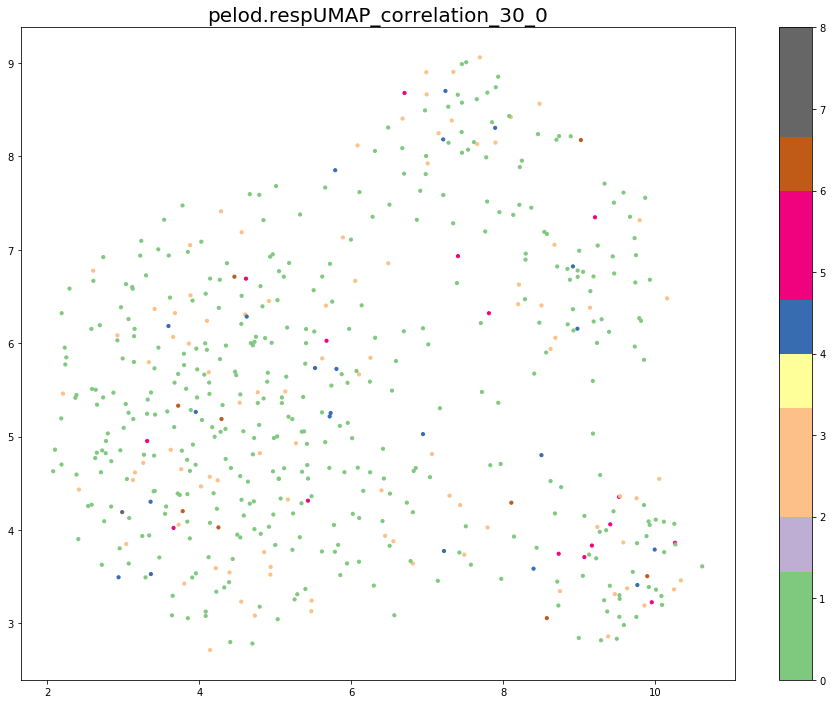

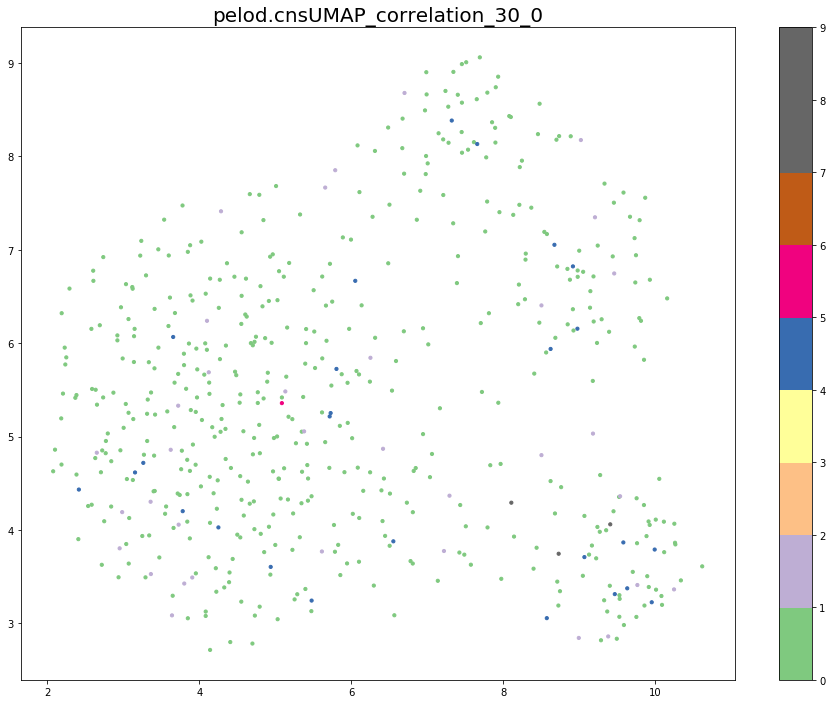

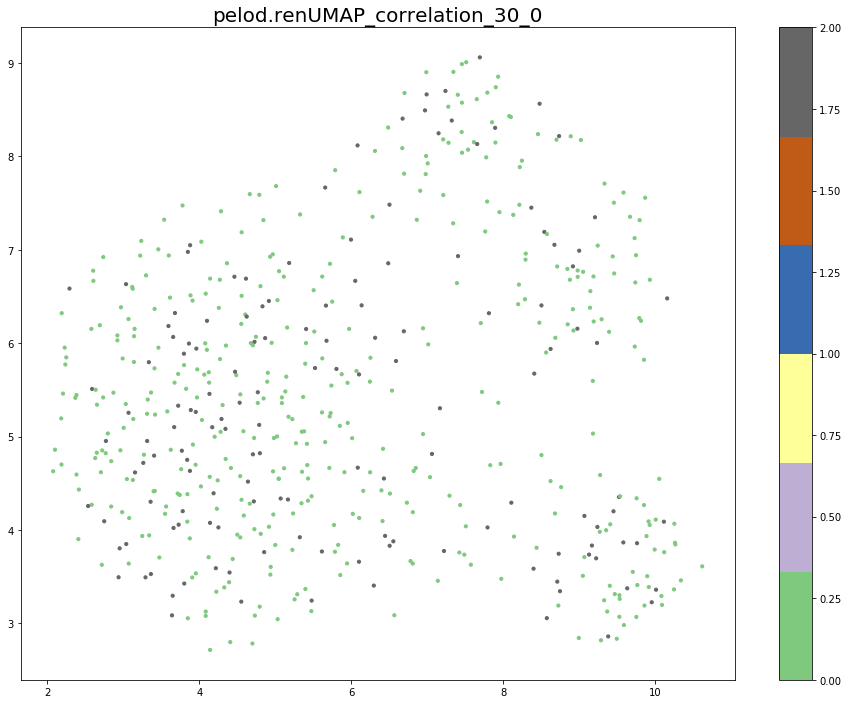

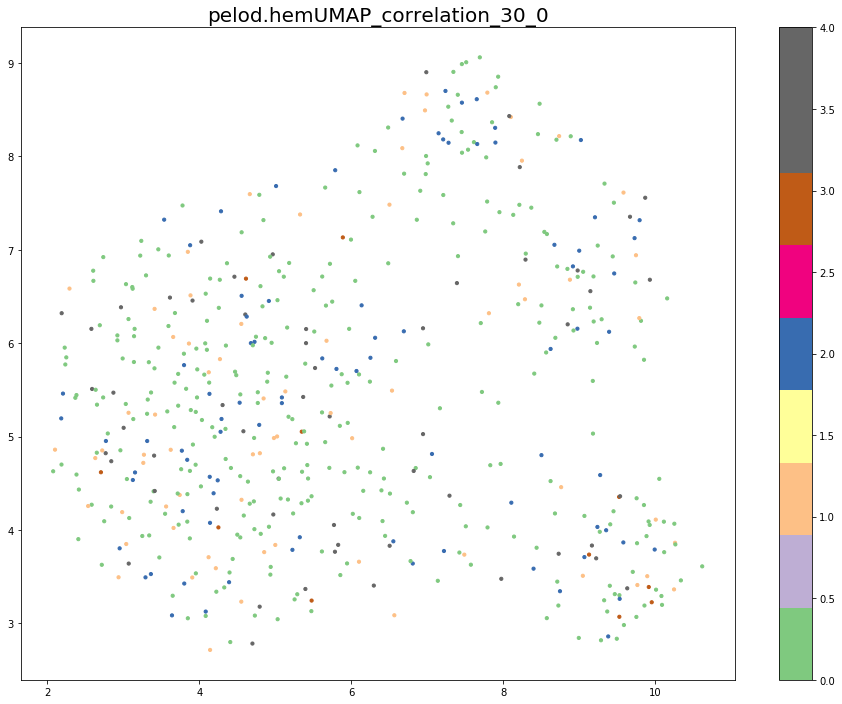

In [164]:
scores_list = ['pelod.cvs','pelod.resp','pelod.cns','pelod.ren','pelod.hem']
for score in scores_list:
    fig = plt.figure(figsize=(16,12))
    lth = len(np.unique(phenotypes[score]))
    plt.scatter(data[:, 0], data[:, 1], s=10, c=phenotypes[score],cmap=plt.cm.get_cmap('Accent', lth))
    cbar = plt.colorbar()
    plt.title(score + filename.split('.')[0], fontsize=20)

# Comorbidity


Text(0.5, 1.0, 'Comorbidity_UMAP_correlation_30_0')

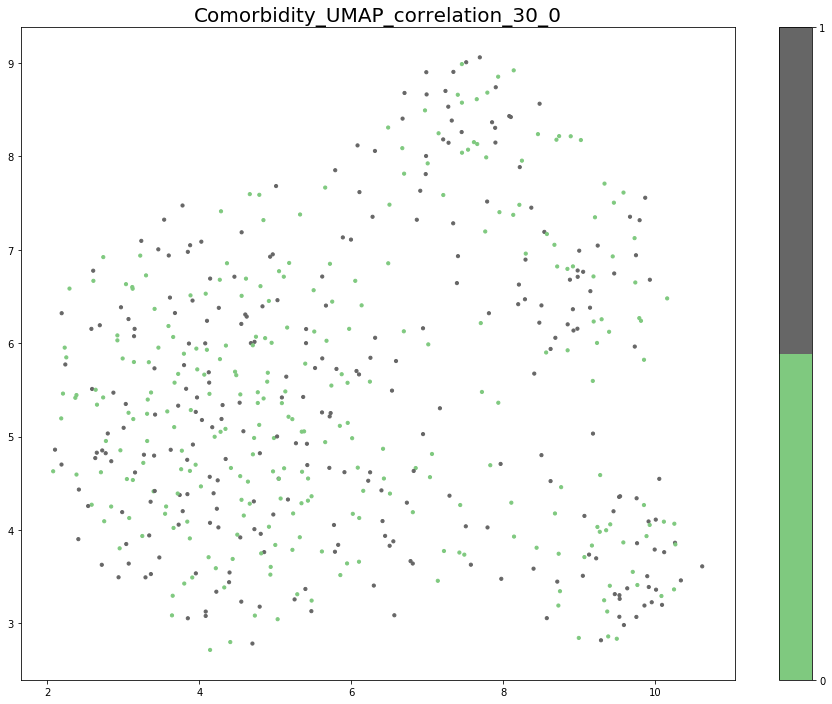

In [162]:
mapping = {'comorbid':1, 'healthy':0}
phenotypes['comorbidity'] = phenotypes['comorbidity'].fillna('healthy')
color = [mapping[phenotypes['comorbidity'].iloc[i]] for i in range(len(phenotypes['comorbidity']))]
fig = plt.figure(figsize=(16,12))
plt.scatter(data[:, 0], data[:, 1], s=10, c=color,cmap=plt.cm.get_cmap('Accent', 2))
plt.colorbar(ticks=[0,1])
plt.title('Comorbidity_' + filename.split('.')[0], fontsize=20)

# Pathogen


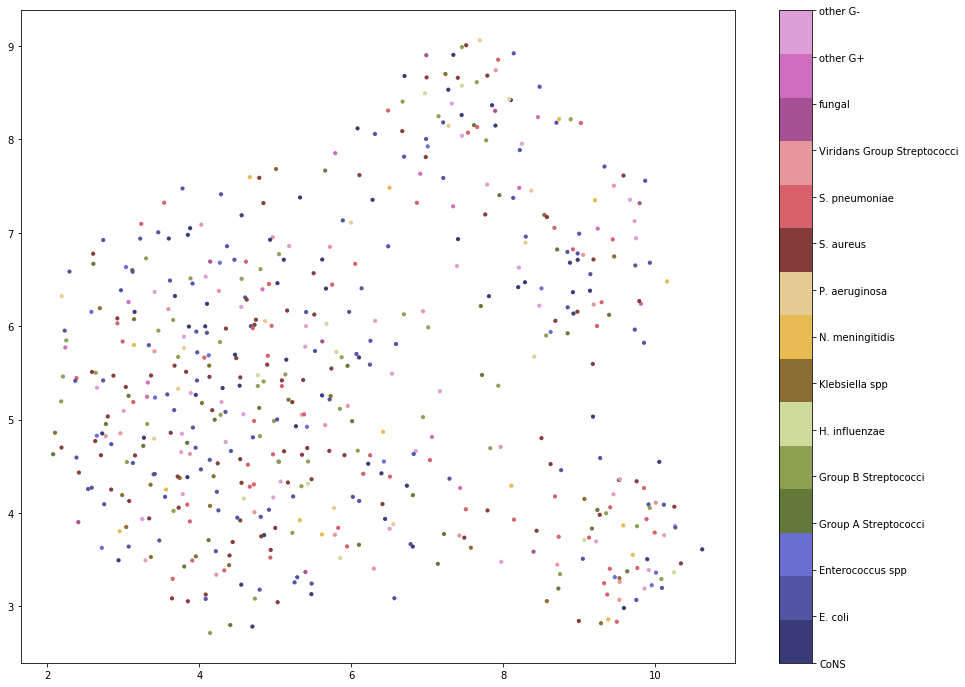

In [169]:
k = 0
mapping = {}

def get_key(val, dict): 
    for key, value in dict.items(): 
         if val == value: 
            return key 
    
fig = plt.figure(figsize=(16,12))
for pathogen in np.unique(phenotypes['pathogen.grp']):
    mapping[pathogen] = k
    k += 1
color = [mapping[phenotypes['pathogen.grp'].iloc[i]] for i in range(len(phenotypes['pathogen.grp']))]

plt.scatter(data[:, 0], data[:, 1], s=10, c=color,  cmap=plt.cm.get_cmap('tab20b', 15))
formatter = plt.FuncFormatter(lambda val, loc: get_key(val, mapping))
plt.colorbar(ticks=np.linspace(0,14,15), format=formatter);

# Clinical focus

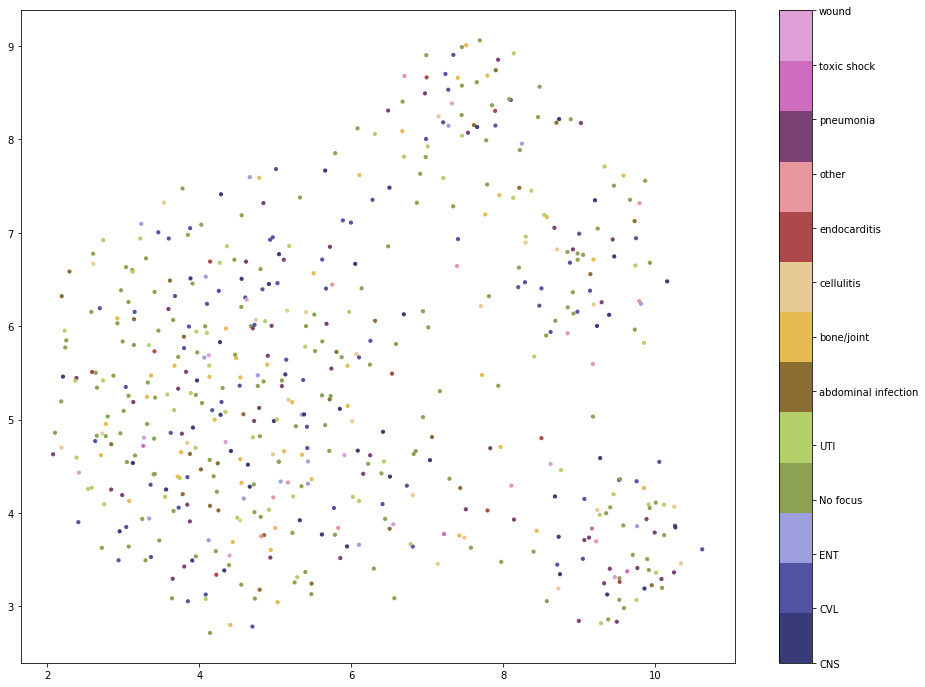

In [175]:
k = 0
mapping = {}

def get_key(val, dict): 
    for key, value in dict.items(): 
         if val == value: 
            return key 
    
fig = plt.figure(figsize=(16,12))
for pathogen in np.unique(phenotypes['clin.focus']):
    mapping[pathogen] = k
    k += 1
color = [mapping[phenotypes['clin.focus'].iloc[i]] for i in range(len(phenotypes['clin.focus']))]

plt.scatter(data[:, 0], data[:, 1], s=10, c=color,  cmap=plt.cm.get_cmap('tab20b', 13))
formatter = plt.FuncFormatter(lambda val, loc: get_key(val, mapping))
plt.colorbar(ticks=np.linspace(0,12,13), format=formatter);